[1.0, 0.888888888888889, 0.8503401360544216, 0.9144947416552358, 1.1383557589417843, 1.6929256101553996]
[1.0, 0.8080808080808082, 0.6310501937324097, 0.48975484892501553, 0.3810268305468553, 0.2982372067978168]
[1.0, 0.8040201005025127, 0.621536874228906, 0.4750258494381755, 0.3620255435606781, 0.2760987680787073]
[1.0, 0.802675585284281, 0.6184153084815888, 0.47025303971774823, 0.35596656021365236, 0.2691772246026098]
[1.0, 0.8016032064128258, 0.6159355839783822, 0.4664826386126584, 0.3512140325410068, 0.2637949851917939]
[1.0, 0.800800800800801, 0.6140859275700387, 0.46368234614740966, 0.34770366591164353, 0.25984601394771284]


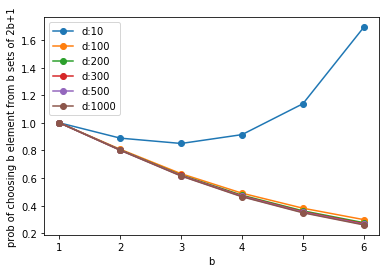

In [1]:
import matplotlib.pyplot as plt
import numpy
import math
import scipy.special
%matplotlib inline

fig = plt.figure()
plt.axes()
for d in [10, 100, 200, 300, 500, 1000]:
    prob = []
    x = []
    for b in range(1,7):
        s = d/(2*b+1)
        x1=scipy.special.binom(2*b+1, b)
        x2=math.factorial(b)
        l = numpy.array([s/(d-i) for i in range(b)])
        x3 = numpy.prod(l)
        
        prob.append(x1*x2*x3)
        x.append(b)
        #{{2b+1}\choose {b}} b! \prod_{i=0}^{b-1} \frac{s}{d-i}

    print(prob)
    lb = "d:" + str(d)
    plt.plot(x, prob, '-o', label=lb)
    plt.legend();
    plt.xlabel("b")
    plt.ylabel("prob of choosing b element from b sets of 2b+1");


In [28]:
import math
import scipy.special
from random import seed
from random import randint

'''
for b in range(1, 5):
    #print(b, math.exp(-b**2/(4*b+2)))
    x1=scipy.special.binom(2*b, b)
    x2=math.factorial(b)
    x3=(2*b+1)**b
    v1 = scipy.special.comb(2*b, b) / scipy.special.comb(2*b+1, b, repetition=True)
    print("b=", b, " Pr no conflics: ", x1*x2/x3)
    #print("b=", b, " Pr no conflics: ", v1)
'''    


print("=====================================")
print("-- throw balls into b bins except 1--")
print("--      SIMULATION                 --")

for b in range(1, 5):
    y=0
    n=0
    rounds=10000
    for i in range(rounds):
        # seed random number generator
        seed(i)
        l = []
        for _ in range(b):
            value = randint(1, 2*b+1)
            if value == 1: # only symbols != 1
                y += 1
                break
            if value in l:
                y += 1
                break
            else:
                l.append(value)
        if len(l) == b:
            n += 1
    print("b=", b, "conflicts:", y/rounds, "   distinct:", n/rounds)

    
print("--      FORMULA                    --")    
for b in range(1, 5):
    v1 = scipy.special.comb(2*b, b) * math.factorial(b) / (2*b+1)**b
    print("b=", b, "conflicts:", 1-v1, "   distinct:", v1)



print("\n\n================================================")
print("-- extract b balls of distinct color, except a color")
print("--                    SIMULATION                  --")

sz_bin=10
for b in range(1, 5):
    y=0
    n=0
    rounds=10000
            
    for i in range(rounds):
        balls = []
        for h in range(2*b+1):
            for k in range(sz_bin):
                balls.append(h)
            
        # seed random number generator
        seed(i)
        l = []
        for round in range(b):
            index = randint(0, len(balls) - 1)
            if (index < 0 or index >= len(balls)):
                print("error index:", index)
            value = balls[index]
            del balls[index]
            if value == 0: # only symbols != 0
                y += 1
                break
            if value in l:
                y += 1
                break
            else:
                l.append(value)
        if len(l) == b:
            n += 1
    print("b=", b, "conflicts:", y/rounds, "   distinct:", n/rounds)

    
print("--                    FORMULA                  --")
for b in range(1, 5):
    d=sz_bin*(2*b+1)

    v3=1.
    for i in range(b):
        v3*=sz_bin/(d-i)
    v3 = scipy.special.comb(2*b, b) * math.factorial(b) * v3
    print("b=", b, "conflicts:", 1-v3, "   distinct:", v3)


-- throw balls into b bins except 1--
--      SIMULATION                 --
b= 1 conflicts: 0.3413    distinct: 0.6587
b= 2 conflicts: 0.5178    distinct: 0.4822
b= 3 conflicts: 0.6506    distinct: 0.3494
b= 4 conflicts: 0.7491    distinct: 0.2509
--      FORMULA                    --
b= 1 conflicts: 0.33333333333333337    distinct: 0.6666666666666666
b= 2 conflicts: 0.52    distinct: 0.48
b= 3 conflicts: 0.6501457725947521    distinct: 0.3498542274052478
b= 4 conflicts: 0.7439414723365341    distinct: 0.25605852766346593


-- extract b balls of distinct color, except a color
--                    SIMULATION                  --
b= 1 conflicts: 0.3394    distinct: 0.6606
b= 2 conflicts: 0.5131    distinct: 0.4869
b= 3 conflicts: 0.6361    distinct: 0.3639
b= 4 conflicts: 0.7257    distinct: 0.2743
--                    FORMULA                  --
b= 1 conflicts: 0.33333333333333337    distinct: 0.6666666666666666
b= 2 conflicts: 0.510204081632653    distinct: 0.489795918367347
b= 3 conf

In [51]:
import math
import scipy.special
from random import seed
from random import randint

r = 100
n = 90


for i in range(len(p)):
    pr=p[i]
    x2=pr**n
    x3=(1.0 - pr)**(r-n)
    print("b={} p={} Prob={}".format(i+1, pr, x1*x2*x3))
    
    
print("CUMULATE")





p = 0.8      # b = 2
p = 0.6122   # b = 3
p = 0.4609   # b = 4

p = 0.5
r = 100

sum = 0
for i in range(0, int(r/2)):
    x1=scipy.special.binom(r, i+1)
    x2=p**(i+1)
    x3=(1.0 - p)**(r-(i+1))
    sum += x1*x2*x3

print(sum, 1-sum)

b=1 p=1 Prob=0.0
b=2 p=0.8 Prob=0.003362819969582695
b=3 p=0.6122 Prob=8.806070393415443e-11
b=4 p=0.4609 Prob=1.9037147784311753e-20
CUMULATE
0.5397946186935894 0.46020538130641064


In [53]:
import math
import scipy.special
from random import seed
from random import randint


for b in range(1,5):
    sum=0
    p = 0.2

    for k in range(1, b+1):
        x1=scipy.special.binom(2*b+1, k)
        x2=p**k
        x3=(1.0 - p)**(2*b+1-k)
        print("prob", k, "errors:", x1*x2*x3)
        sum += x1*x2*x3

    print("b:", b, "error rate:", sum)
    print("b:", b, "accuracy:", 1.-sum)


prob 1 errors: 0.3840000000000001
b: 1 error rate: 0.3840000000000001
b: 1 accuracy: 0.6159999999999999
prob 1 errors: 0.4096000000000001
prob 2 errors: 0.2048000000000001
b: 2 error rate: 0.6144000000000002
b: 2 accuracy: 0.38559999999999983
prob 1 errors: 0.36700160000000015
prob 2 errors: 0.27525120000000014
prob 3 errors: 0.11468800000000005
b: 3 error rate: 0.7569408000000003
b: 3 accuracy: 0.2430591999999997
prob 1 errors: 0.30198988800000015
prob 2 errors: 0.3019898880000002
prob 3 errors: 0.1761607680000001
prob 4 errors: 0.06606028800000002
b: 4 error rate: 0.8462008320000005
b: 4 accuracy: 0.1537991679999995


In [19]:
import math
import scipy.special
from random import seed
from random import randint
# scipy.special.comb(N, k, exact=False, repetition=False)


b = 3
v1 = scipy.special.comb(2*b, b) * math.factorial(b) / (2*b+1)**b
print(v1)
v2 = scipy.special.comb(2*b, b) / scipy.special.comb(2*b+1, b, repetition=True)
print(v2)


d=1000
sz_bin=int(d/(2*b+1))
v3=1.
for i in range(b):
    v3*=sz_bin/(d-i)
v3 = scipy.special.comb(2*b, b) * math.factorial(b) * v3
print(v3)






0.3498542274052478
0.23809523809523808
0.34462775400651147


In [29]:
import random
# Function for biased coin
# p is the probabilty of Head
def flip(p):
    return 1 if random.random() < p else 0

ok0=0
ok1=0
ok2=0
ok3=0
rounds=1000000
chkl0 = [[0,0,0]]
chkl1 = [[1,0,0], [0,1,0], [0,0,1]]
chkl2 = [[1,1,0], [1,0,1], [0,1,1]]
chkl3 = [[1,1,1]]

for r in range(rounds):
    l = []
    for i in range(3):
        l.append(flip(0.2))
    if l == chkl1[0] or l == chkl1[1] or l == chkl1[2]:
        ok1+=1
    if l == chkl2[0] or l == chkl2[1] or l == chkl2[2]:
        ok2+=1
    if l == chkl0[0]:
        ok0+=1
    if l == chkl3[0]:
        ok3+=1
                
        
print(ok3/rounds)
print(0.2*0.2*0.2)
print(ok1/rounds)
print(3*0.2*0.8*0.8)
print(ok2/rounds)
print(3*0.2*0.2*0.8)
print(ok0/rounds)
print(0.8*0.8*0.8)




0.007955
0.008000000000000002
0.383772
0.3840000000000001
0.096188
0.09600000000000003
0.512085
0.5120000000000001
